In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
#Costrutti globali
MONTHS = {1:"Gennaio", 2:"Febbraio",3:"Marzo",4:"Aprile",5:"Maggio",6:"Giugno",
          7:"Luglio",8:"Agosto",9:"Settembre",10:"Ottobre",11:"Novembre",12:"Dicembre"}
SUBCSV_COLNUM = {0:1,1:3,2:2,3:2,4:2,5:3,6:2}
def int_to_month(i):
    return MONTHS[i]
#Importa tutti i file csv contenuti nella cartella e li divide in sotto-CSV, salvandoli
directory_str = '../CSVs/'
subdirectory_str = "InternalData/"
directory = os.fsencode(directory_str)
    
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        
        #periodo di riferimento
        month = filename.split('_')[2]
        year = '20'+filename.split('_')[3].replace(".csv","")
        period = year+"_"+month
        
        #ottengo il dataframe 'crudo'
        fdir = directory_str+filename
        raw_df = pd.read_csv(fdir, encoding='utf8', header=None)
        
        #trovo i separatori e ottengo i rispettivi sotto-csv 
        subcsv_indexes = []
        rows = len(raw_df)
        for index in range(rows):
            if (raw_df.iloc[index,0])[0:3] == '---':
                subcsv_indexes.append(index)
        prev = 1
        i = 0
        #genera i subcsv delimitati da "-- ... -"
        for i in range(len(subcsv_indexes)-1):
            #elimina le sezioni 1, 3 e 4, poco informative
            lr = subcsv_indexes[i+1]
            if i != 0 and i != 4 and i != 3:
                sub_df = raw_df.iloc[prev:lr,:SUBCSV_COLNUM[i]]
                sub_df.to_csv(directory_str+subdirectory_str+"subdf_"+period+"_"+str(i)+".csv", index=False, header=False)
            prev = lr + 2
        #Genera l'ultimo subcsv non delimitato e a dimensione variabile
        i += 1
        sub_df = raw_df.iloc[prev:,:SUBCSV_COLNUM[i]]
        sub_df.to_csv(directory_str+subdirectory_str+"subdf_"+period+"_"+str(i)+".csv", index=False, header=False)
    else:
        continue


<h1><center><b>Progetto di Scienza dei Dati e Laboratorio</b></center></h1> 
<h2><center>A.A. 2023-2024</center></h2>
<h2><center>Danielis Jacopo</center></h2>
<p><center><img src="Logo_Università_di_Udine.svg.png" alt="alt text" width="200"/></center></p>

<h2><center><b>Il Progetto:</b></center></h2>
<p>
    Analisi vendite del panificio/pasticceria artigianale gluten-free dei miei zii.



<li>Attività nuova.</li>

<li>Mercato non saturato da altre entità commerciali.</li>

<li>Contatto diretto con esperti del dominio</li>

<h2><center><b>Il Dataset:</b></center></h2>
<p>
    Insieme di file in formato csv contenenti i resoconti mensili dell'attività.<br/>
    I resoconti sono suddivisi a loro volta in csv contenenti specifiche statistiche:
    <ul>
        <li>Periodo di riferimento</li>
        <li>Totalizzatori dei pagamenti.</li>
        <li>Dettaglio pagamenti</li>
        <li>Dettaglio IVA</li>
        <li>Dettaglio documenti</li>
        <li>Prodotti venduti</li>
        <li>Fatture a terzi</li>
    </ul>
</p>


<h2><center><b>Il Dataset:</b></center></h2>
<p>
    <b>La strutturazione:</b>
    <ul>
        <li>Suddivisione dei file nelle diverse statistiche.</li>
        <li>Eliminazione di statistiche di poco interesse.</li>
        <li>Aggregazione dei diversi resoconti per statistica.</li>
        <li>Aggregazione dei diversi prodotti in tipologie.</li>
    </ul>
</p>


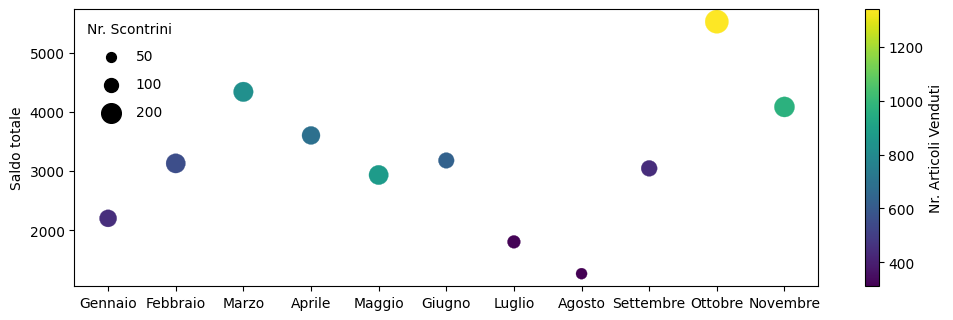

In [2]:
# Analisi csv 1:
df_1_list = np.array([])

fullsubdirectory_str = directory_str+subdirectory_str
subdirectory = os.fsencode(fullsubdirectory_str)

for file in os.listdir(subdirectory):
    filename = os.fsdecode(file)
    if filename.endswith("_1.csv"):
        filepath = fullsubdirectory_str + filename
        subdf_1 = pd.read_csv(filepath, encoding='utf8')
        month = filename.split('_')[2]
        year = filename.split('_')[1]
        data = np.array([year, month], dtype='int16')
        df_row = np.array([*data , *subdf_1.values[0]])
        df_1_list = np.concatenate([df_1_list, df_row])
rownum = len(df_1_list)//5
df_1_list = df_1_list.reshape((rownum,5))        
df_1 = pd.DataFrame(df_1_list, columns=['Anno', 'Mese', 'Saldo Totale', 'Articoli Venduti', 'Documenti Emessi'])
df_1 = df_1.astype(dtype={'Anno':'int','Mese':'int','Saldo Totale':'float','Articoli Venduti':'float','Documenti Emessi':'int'})
df_1 = df_1.sort_values(['Anno','Mese']).reset_index(drop = True)

df_1['Mese'] = df_1['Mese'].map(lambda x: int_to_month(x))
plt.figure(figsize = (12, 3.6))
plt.scatter( df_1['Mese'], df_1['Saldo Totale'], label=None, c=df_1['Articoli Venduti'],
           cmap='viridis', s=df_1['Documenti Emessi'], linewidth=0.2)
plt.colorbar(label='Nr. Articoli Venduti')
for doc in [50, 100, 200]:
    plt.scatter([],[],c='k', s=doc, label=str(doc))
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Nr. Scontrini')
plt.ylabel('Saldo totale');
plt.savefig('df_1.png', bbox_inches='tight')

<h2><center>Andamento Generale</center></h2>
<p>
    <img src="df_1.png">
</p>

<h2><center>Andamento Generale</center></h2>
<p>
    Diminuzione delle vendite nei primi mesi estivi<br/>
    Confronto con gli esperti del dominio per l'individuazione di possibili cause:
    <ul>
        <li>Meno giorni di apertura</li>
        <li>Clienti in vacanza</li>
    </ul>    
</p>

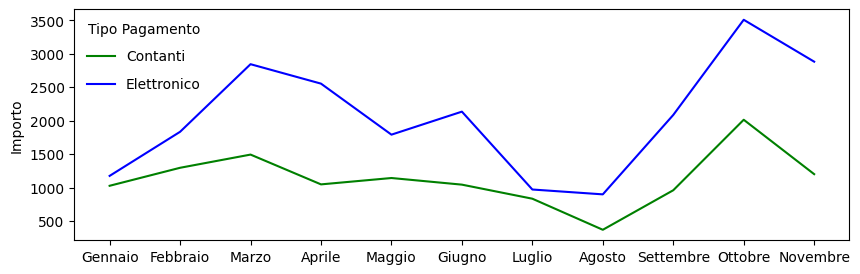

In [3]:
# Riepilogo csv 2

df_2_list = np.array([])

fullsubdirectory_str = directory_str+subdirectory_str
subdirectory = os.fsencode(fullsubdirectory_str)

for file in os.listdir(subdirectory):
    filename = os.fsdecode(file)
    if filename.endswith("_2.csv"):
        filepath = fullsubdirectory_str + filename
        subdf_2 = pd.read_csv(filepath, encoding='utf8')
        month = filename.split('_')[2]
        year = filename.split('_')[1]
        data = np.array([year, month], dtype='int16')
        df_row = np.array([*data , subdf_2.at[0,'Importo'], subdf_2.at[1,'Importo']])
        df_2_list = np.concatenate([df_2_list, df_row])
rownum = len(df_2_list)//4
df_2_list = df_2_list.reshape((rownum,4))        
df_2 = pd.DataFrame(df_2_list, columns=['Anno', 'Mese', 'Contanti', 'Elettronico'])
df_2 = df_2.astype(dtype={'Anno':'int','Mese':'int','Contanti':'float','Elettronico':'float'})
df_2 = df_2.sort_values(['Anno','Mese']).reset_index(drop = True)

df_2['Mese'] = df_2['Mese'].map(lambda x: int_to_month(x))
plt.figure(figsize = (10, 3) )

plt.plot(df_2['Mese'], df_2['Contanti'], '-g' , label='Contanti')   
plt.plot(df_2['Mese'], df_2['Elettronico'], '-b' , label='Elettronico')
plt.legend(frameon=False, labelspacing=1, title='Tipo Pagamento')
plt.ylabel('Importo');
plt.savefig('df_2.png', bbox_inches='tight')

<h2><center>Pagamenti</center></h2>
<p>
    <img src="df_2.png">
    Riflettono l'andamento dei pagamenti generali<br/>
</p>

C:\Users\bruda\AppData\Local\Temp\ipykernel_18996\3165572792.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_5 = pd.concat([df_5, subdf_5])


<Figure size 2000x400 with 0 Axes>

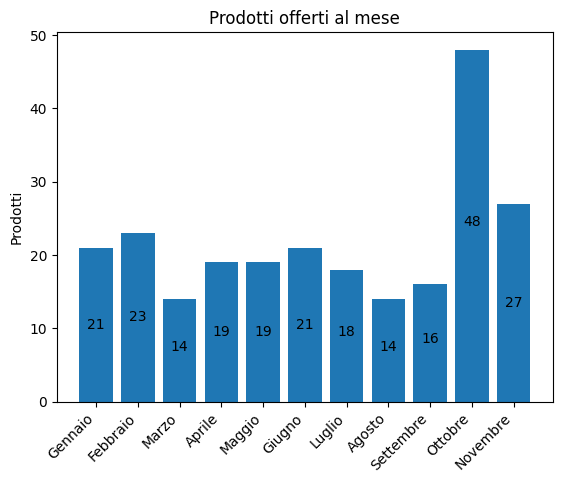

In [4]:
# Riepilogo csv 5
df_5 = pd.DataFrame(columns = ['Anno', 'Mese', 'Descrizione', 'Quantità', 'Prezzo totale'])
fullsubdirectory_str = directory_str+subdirectory_str
subdirectory = os.fsencode(fullsubdirectory_str)

for file in os.listdir(subdirectory):
    filename = os.fsdecode(file)
    if filename.endswith("_5.csv"):
        filepath = fullsubdirectory_str + filename
        subdf_5 = pd.read_csv(filepath, encoding='utf8')
        month = filename.split('_')[2]
        year = filename.split('_')[1]
        rows = len(subdf_5)
        Mese = np.full(rows, month)
        Anno = np.full(rows, year)
        subdf_5.insert(0, "Mese", Mese)
        subdf_5.insert(0, "Anno", Anno)
        df_5 = pd.concat([df_5, subdf_5])
df_5 = df_5.astype(dtype={'Anno':'int','Mese':'int'})
df_5 = df_5.sort_values(['Anno','Mese']).reset_index(drop = True)      

temp = df_5.groupby(["Anno","Mese"])["Descrizione"].count().round(2).reset_index()
temp['Mese'] = temp['Mese'].map(lambda x: int_to_month(x))

plt.figure(figsize=(20,4))
fig, ax = plt.subplots()
def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i],ha='center')
ax.bar(temp['Mese'],temp['Descrizione'], align='center');
add_labels(temp['Mese'],temp['Descrizione'])
plt.xticks(rotation=45,ha='right')
ax.set(ylabel='Prodotti', title='Prodotti offerti al mese')
plt.savefig('df_5_count.png', bbox_inches='tight')

<h2><center>I prodotti</center></h2>
<p>
    Vediamo inizialmente l'offerta di prodotti e come differisce nei mesi.<br/>
    <img src="df_5_count.png">
</p>

<h2>I prodotti</h2>
<p>
    Le motivazioni:
    <ul>
        <li>Corsi di Formazione</li>
        <li>Festività e prodotti mirati</li>
    </ul>
</p>

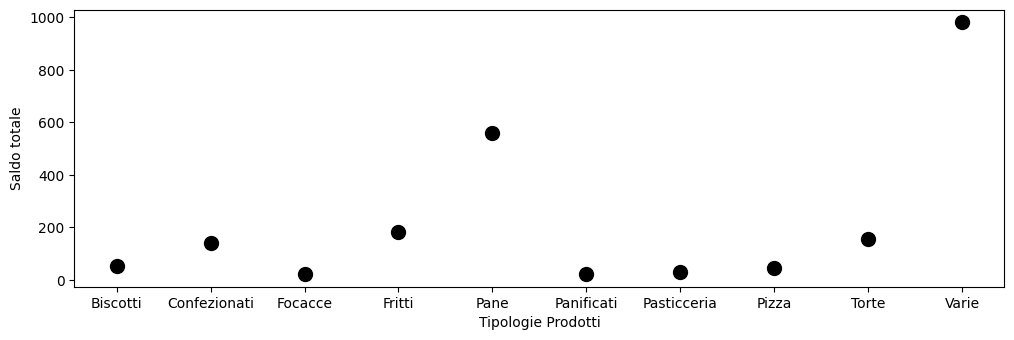

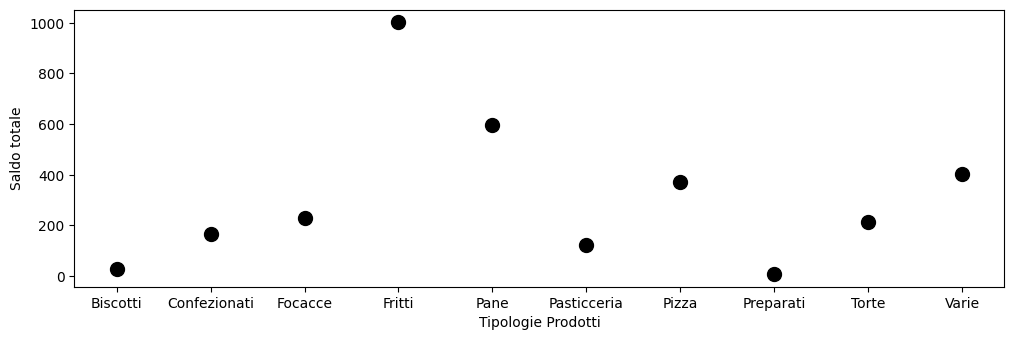

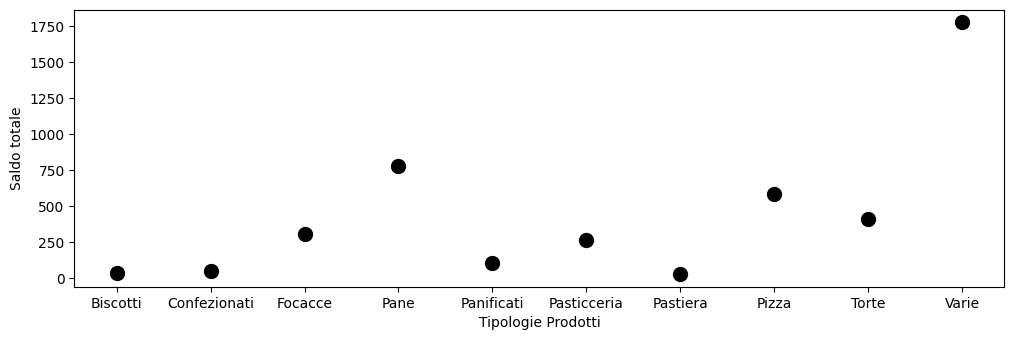

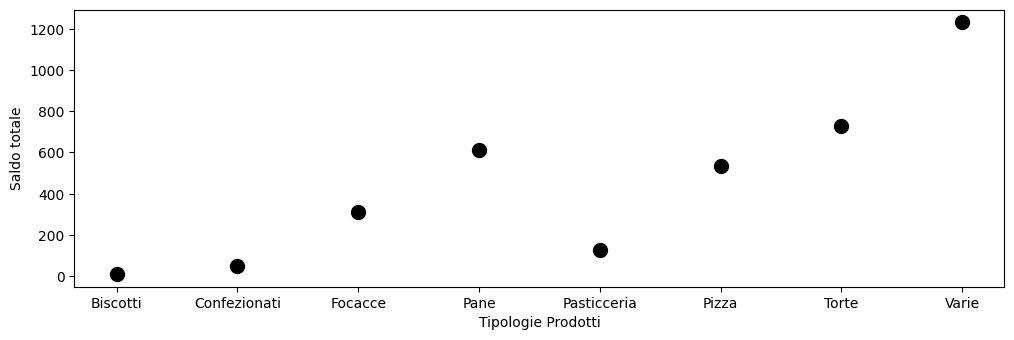

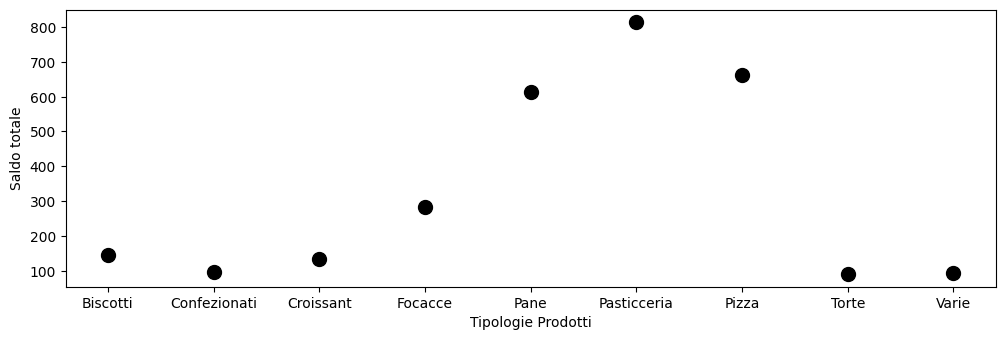

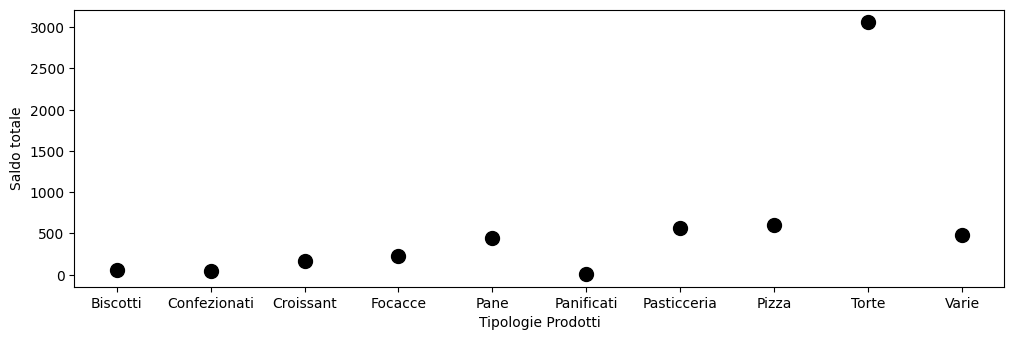

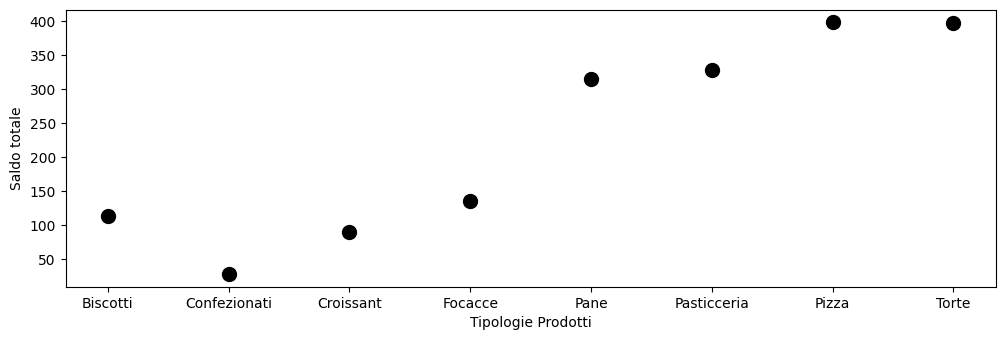

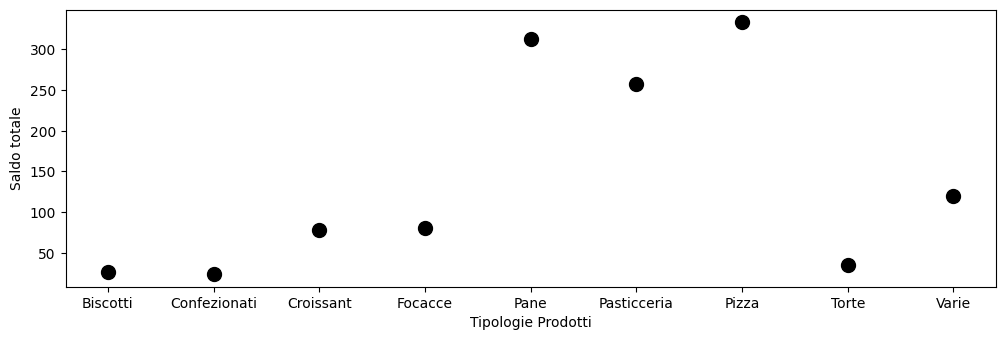

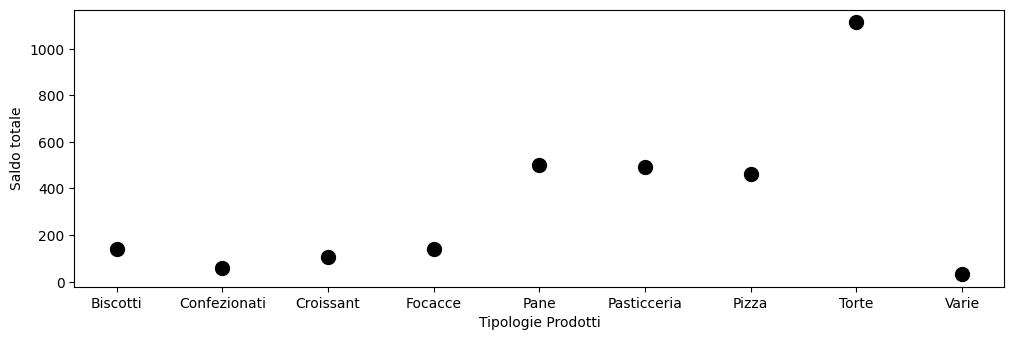

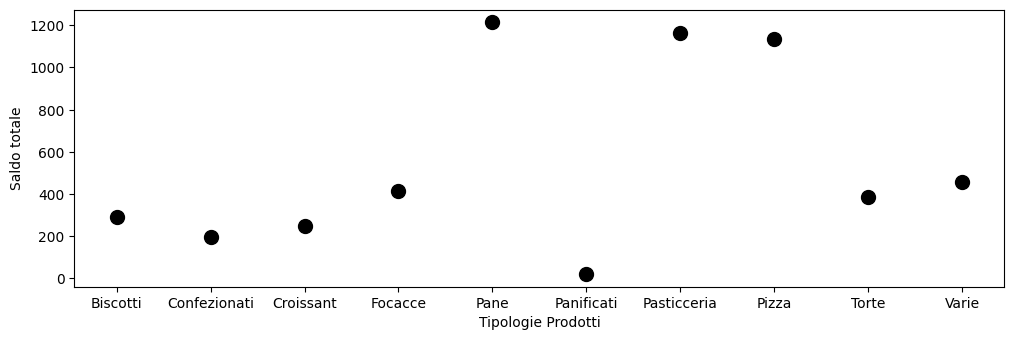

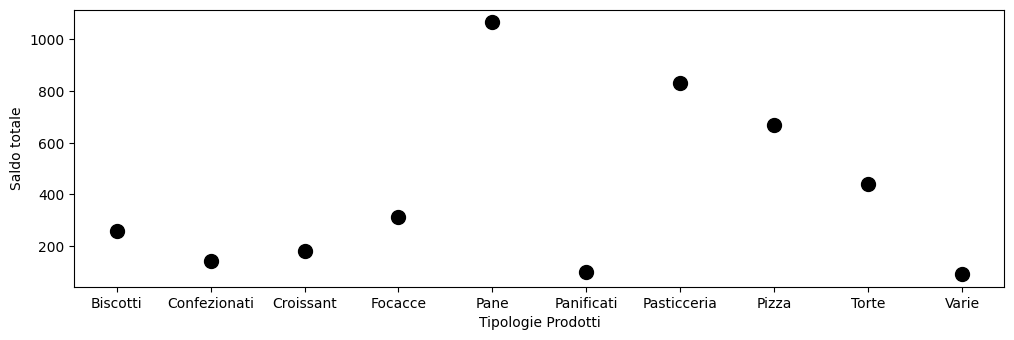

In [5]:
PRODGROUPS = {
"N2 - Non soggetta IVA":"Varie",
"PANE":"Pane",
"TORTE SU PRENOTAZIONE":"Torte",
"FRITTELLE ALLA CREMA":"Fritti",
"FRITTELLE MELE E UVETTA":"Fritti",
"GRISSINI 100G":"Confezionati",
"Pizza":"Pizza",
"CROSTOLI CONFEZIONE 125G":"Confezionati",
"CROSTOLI SFUSI":"Fritti",
"BIGNE' CREMA O CIOCCOLATO":"Pasticceria",
"COOKIES 130G":"Biscotti",
"BISCOTTI CASTAGNE NOCCIOLE 100G":"Biscotti",
"FOCACCIA GENOVESE":"Focacce",
"SACHER FETTA":"Torte",
"PANETTONE NATALIZIO SG 500G":"Panificati",
"COOKIES CIOCCOLATO E ARACHIDI 130G":"Confezionati",
"FETTINE ALLE MANDORLE 125G":"Confezionati",
"CROCCANTE ALLE NOCCIOLE 100G":"Confezionati",
"BISCOTTI RUSTICI VERDUZZO 125G":"Confezionati",
"PANETTONE NATALIZIO SG 100G":"Panificati",
"MERINGHE":"Pasticceria",
"IVA AL 10%":"Varie",
"PIZZA MARGHERITA":"Pizza",
"PIZZA FARCITA":"Pizza",
"FOCACCIA FARCITA":"Focacce",
"BISCOTTI RUSTICI VERDUZZO 150g":"Biscotti",
"PREPARATO PER CIOCCOLATA CALDA":"Preparati",
"IVA 10%":"Varie",
"Colomba IVA AL 10%":"Panificati",
"Biscotti IVA AL 10%":"Biscotti",
"Pastiera IVA AL 10%":"Pastiera",
"Focaccia pom ol IVA AL 10%":"Focacce",
"Sfincione IVA AL 10%":"Focacce",
"Decorazioni":"Varie",
"Pizza prosciutto e salamino IVA AL 10%":"Pizza",
"Cornetti IVA AL 10%":"Pasticceria",
"Pangrattato IVA AL 10%":"Confezionati",
"MERINGHE E CIOCCOLATO FONDENTE":"Pasticceria",
"Crostini IVA AL 10%":"Confezionati",
"PASTICCERIA FRESCA - 2":"Pasticceria",
"PASTICCERIA FRESCA - 3":"Pasticceria",
"BISCOTTI CONF 150G":"Biscotti",
"CROISSANT VUOTO":"Croissant",
"Croissant IVA AL 10%":"Croissant",
"CORNETTI":"Croissant",
"Focaccia dolce IVA AL 10%":"Focacce",
"CROISSANT FARCITO":"Croissant",
"PANGRATTATO 200G":"Confezionati",
"Buffet IVA AL 10%":"Varie",
"FOCACCIA DOLCE 380G":"Focacce",
"Cjalsons senza glutine IVA AL 10%":"Pasticceria",
"Plumcake lim/fava Tonka IVA AL 10%":"Panificati",
"BISCOTTONE":"Biscotti",
"WEDDING CAKE":"Torte",
"PASTICCERIA FRESCA consegnata":"Pasticceria",
"BISCOTTI CONF 200G":"Biscotti",
"Tarallo IVA AL 10%":"Confezionati",
"Buffet salato IVA AL 10%":"Varie",
"Taralli IVA AL 10%":"Confezionati",
"PANGRATTATO 300G":"Confezionati",
"WEDDING Cake":"Torte",
"CROSTINI 100G":"Confezionati",
"GRISSINI 150G":"Confezionati",
"PANE ALLA ZUCCA E UVETTA":"Pane",
"FAVETTE 100G":"Confezionati",
"PANE ZUCCA SALATO":"Pane",
"PASTICCERIA FRESCA cabaret":"Pasticceria",
"Pane zucca dolce":"Pane",
"FAVETTE 100 G ":"Confezionati",
"Pan dolce zucca IVA AL 10%":"Pane",
"FOCACCIA Farcita rett":"Focacce",
"Pane zucca dolce. ":"Pane",
"Plumcake IVA AL 10%":"Panificati",
"Muffin IVA AL 10%":"Pasticceria",
"Pane zucca":"Pane",
"Favette CONF 100g":"Confezionati",
"Pane zucca dolce IVA AL 10%":"Pane",
"Meringhe IVA AL 10%":"Pasticceria",
"MERINGHE 50g":"Pasticceria",
"Pane dolce zucca":"Pane",
"Pan di zucca dolce IVA AL 10%":"Pane",
"Pane zucca dolce ":"Pane",
"Pane zucca Dolce":"Pane",
"Pane rosetta":"Pane",
"Grissotti":"Panificati",
"GRISSOTTI 200G":"Confezionati",
"GRISSINI 200G":"Confezionati",
"GRISSINI 200 G":"Panificati",
"Pane di zucca dolce":"Pane",
"PANE DOLCE ALLA ZUCCA E UVETTA":"Pane",
"Pane zucca dolceIVA AL 10%":"Pane",
"Pane dolce zucca IVA AL 10%":"Pane",
"IVA AL 10% pane zucca dolce":"Pane",
"Pane di zucca dolce IVA AL 10%":"Pane",
"PANE con ZUCCA e SEMI di ZUCCA":"Pane",
"Tramezzini misti":"Panificati",
"FOCACCIA DOLCE 480G":"Focacce",
"FOCACCIA DOLCE 580G":"Focacce",
"PLUMCAKE LIMONE E VANIGLIA":"Panificati",
"PASTICCERIA FRESCA ":"Pasticceria",
"Croissant salati salmone":"Croissant",
"Croissant salati prosciutto":"Croissant"
}
def prod_to_group(series):
    return series.map(PRODGROUPS)
df_5 = df_5.assign(Gruppo=lambda x: prod_to_group(x['Descrizione']))
df_5

#Analisi per gruppo
sub5 = df_5.groupby(["Anno","Mese","Gruppo"])["Prezzo totale"].sum().round(2).reset_index()
sub5['Mese'] = sub5['Mese'].map(lambda x: int_to_month(x))


months = ['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre']
for month in months:
    x = sub5[sub5['Mese']==month]['Gruppo']
    y = sub5[sub5['Mese']==month]['Prezzo totale']
    plt.figure(figsize = (12, 3.6))
    plt.scatter( x, y, c='k', s=100)
    plt.ylabel('Saldo totale');
    plt.xlabel('Tipologie Prodotti');
    plt.savefig('Plots/'+month+'_df_5_groups.png', bbox_inches='tight')



<h2>Tipologie di Prodotti</h2>
<p>
    Suddivisione dei prodotti in diverse categorie.<br/>
    Distribuzione degli introiti per categoria al mese.
</p>

<h3>Tipologie di Prodotti: Gennaio</h3>
<p>
    <img src="Plots/Gennaio_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Febbraio</h3>
<p>
    <img src="Plots/Febbraio_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Marzo</h3>
<p>
    <img src="Plots/Marzo_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Aprile</h3>
<p>
    <img src="Plots/Aprile_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Maggio</h3>
<p>
    <img src="Plots/Maggio_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Giugno</h3>
<p>
    <img src="Plots/Giugno_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Luglio</h3>
<p>
    <img src="Plots/Luglio_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Agosto</h3>
<p>
    <img src="Plots/Agosto_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Settembre</h3>
<p>
    <img src="Plots/Settembre_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Ottobre</h3>
<p>
    <img src="Plots/Ottobre_df_5_groups.png">
</p>

<h3>Tipologie di Prodotti: Novembre</h3>
<p>
    <img src="Plots/Novembre_df_5_groups.png">
</p>

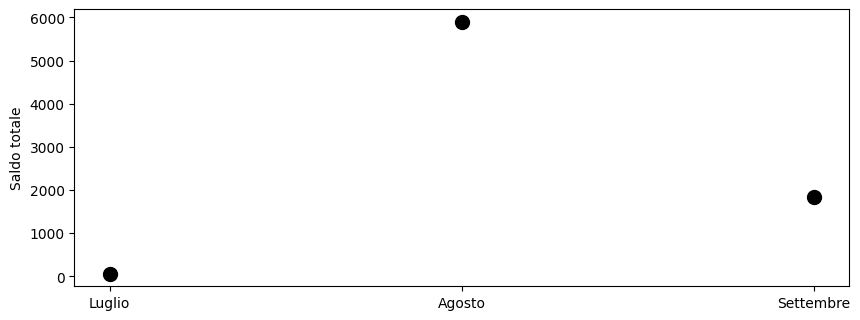

In [6]:
# Riepilogo csv 6
df_6 = pd.DataFrame(columns = ['Anno', 'Mese', 'Descrizione', 'Prezzo totale'])
fullsubdirectory_str = directory_str+subdirectory_str
subdirectory = os.fsencode(fullsubdirectory_str)
def price_conversion(price_str):
    return float(price_str[0:-2])

for file in os.listdir(subdirectory):
    filename = os.fsdecode(file)
    if filename.endswith("_6.csv"):
        filepath = fullsubdirectory_str + filename
        subdf_6 = pd.read_csv(filepath, encoding='utf8')
        month = filename.split('_')[2]
        year = filename.split('_')[1]
        rows = len(subdf_6)
        Mese = np.full(rows, month)
        Anno = np.full(rows, year)
        subdf_6.insert(0, "Mese", Mese)
        subdf_6.insert(0, "Anno", Anno)
        df_6 = pd.concat([df_6, subdf_6])
df_6["Prezzo totale"] = df_6["Prezzo totale"].map(lambda x: price_conversion(x))
df_6 = df_6.astype(dtype={'Anno':'int','Mese':'int'})
df_6 = df_6.sort_values(['Anno','Mese']).reset_index(drop = True)      
df_6

#Analisi per gruppo
sub6 = df_6.groupby(["Mese"])["Prezzo totale"].sum().round(2).reset_index()
sub6['Mese'] = sub6['Mese'].map(lambda x: int_to_month(x))

plt.figure(figsize = (10, 3.6))
months = ['Gennaio','Febbraio','Marzo','Aprile','Maggio','Giugno','Luglio','Agosto','Settembre','Ottobre','Novembre']
for month in months:
    x = sub6[sub6['Mese']==month]['Mese']
    y = sub6[sub6['Mese']==month]['Prezzo totale']
    plt.scatter( x, y, c='k', label=month, s=100)
plt.ylabel('Saldo totale');

plt.savefig('df_6_terzi.png', bbox_inches='tight')

<h2><center>Fatture a terzi</center></h2>
<p>
    <img src="df_6_terzi.png">
</p>

<h2><center>Fatture a Terzi</center></h2>
<p>
    Non presenti in tutte le mensilità.<br/>
    Presenti nella stagione dei matrimoni per servizio Catering.<br/>
    Controtendenza alle poche vendite al dettaglio.<br/>
    Come influiscono sul totale?

</p>

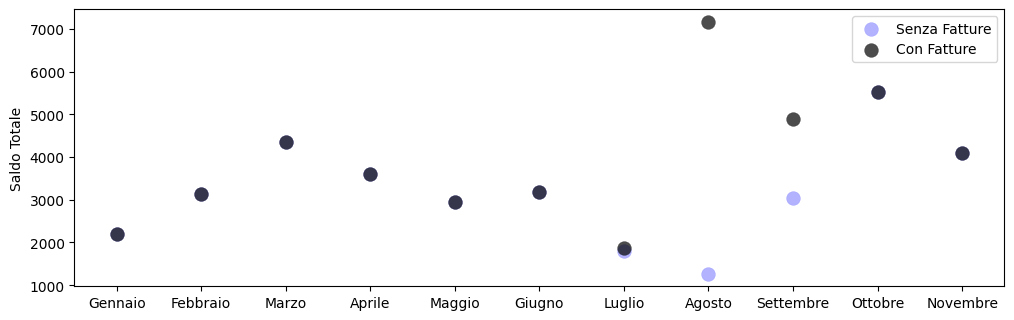

In [7]:
Total = df_1.drop(axis=1, labels=['Articoli Venduti', 'Documenti Emessi'])
#aggiungiamo al resoconto totale le fatture a terzi
Total.loc[6,['Saldo Totale']] += 58
Total.loc[7,['Saldo Totale']] += 5900
Total.loc[8,['Saldo Totale']] += 1837.8
plt.figure(figsize = (12, 3.6))
plt.scatter( df_1['Mese'], df_1['Saldo Totale'], label='Senza Fatture', c='b',
           s=100, linewidth=0.2, alpha=0.3)
plt.scatter( Total['Mese'],Total['Saldo Totale'], label='Con Fatture', c='k',
           s=100, linewidth=0.2, alpha=0.7)
plt.legend()
plt.ylabel('Saldo Totale');
plt.savefig('Total.png', bbox_inches='tight')

<h2><center>Totali</center></h2>
<p>
    <img src="Total.png">
</p>

<h2><center>Totali</center></h2>
<p>
    Agosto e Settembre fortemente impattati, con 5900€ e 1878.80€ di aumento rispettivamente.<br/>
    Dettato da Matrimoni e Catering a eventi.
</p>

<h2><center>Conclusioni</center></h2>
<p>
    Prodotti stagionali.<br/>
    Fritti a Febbraio per Carnevale.<br/>
    Pasticceria e Panificati a Marzo per Pasqua.<br/>
    Torte a Luglio e Settembre per Matrimoni.<br/>
    Pane di zucca a Ottobre. <br/>
    Eventi speciali importanti fonti di reddito
</p>